# PROJECT OVERVIEW

1.  Measurements of fetal heart rate(FHR) and uterine contraction(UC) features on cardiotocograms.

2.  2126 fetal cardiotocograms(CTGs) automatically processed and diagnostic features measured.

3. CTGs classified by three expert obstetricians and consensus label as Normal, Suspect, or Pathologic.


# READ DATA

df <- read.csv("CTG.csv")

In [2]:
head(df)

LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
120,0.000000000,0,0.000000000,0.000000000,0,0.000000000,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
132,0.006379585,0,0.006379585,0.003189793,0,0.000000000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
133,0.003322259,0,0.008305648,0.003322259,0,0.000000000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
134,0.002560819,0,0.007682458,0.002560819,0,0.000000000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
132,0.006514658,0,0.008143322,0.000000000,0,0.000000000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
134,0.001049318,0,0.010493179,0.009443861,0,0.002098636,26,5.9,0,...,50,200,5,3,76,107,107,170,0,3


In [3]:
df$NSP <- as.factor(df$NSP)

In [4]:
table(df$NSP)


   1    2    3 
1655  295  176 

# DATA PARTITION

In [9]:
set.seed(123)
data= sort(sample(nrow(df),nrow(df)*0.7))
train_df <- df[data,]
test_df <- df[-data,]
dim(train_df)
dim(test_df)

[1] 1488   22

[1] 638  22

# RANDOM FOREST MODEL & PLOT

In [10]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [11]:
rf <- randomForest(NSP~.,data=train_df)

In [12]:
rf


Call:
 randomForest(formula = NSP ~ ., data = train_df) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 5.91%
Confusion matrix:
     1   2   3 class.error
1 1153  17   2   0.0162116
2   50 145   4   0.2713568
3    6   9 102   0.1282051

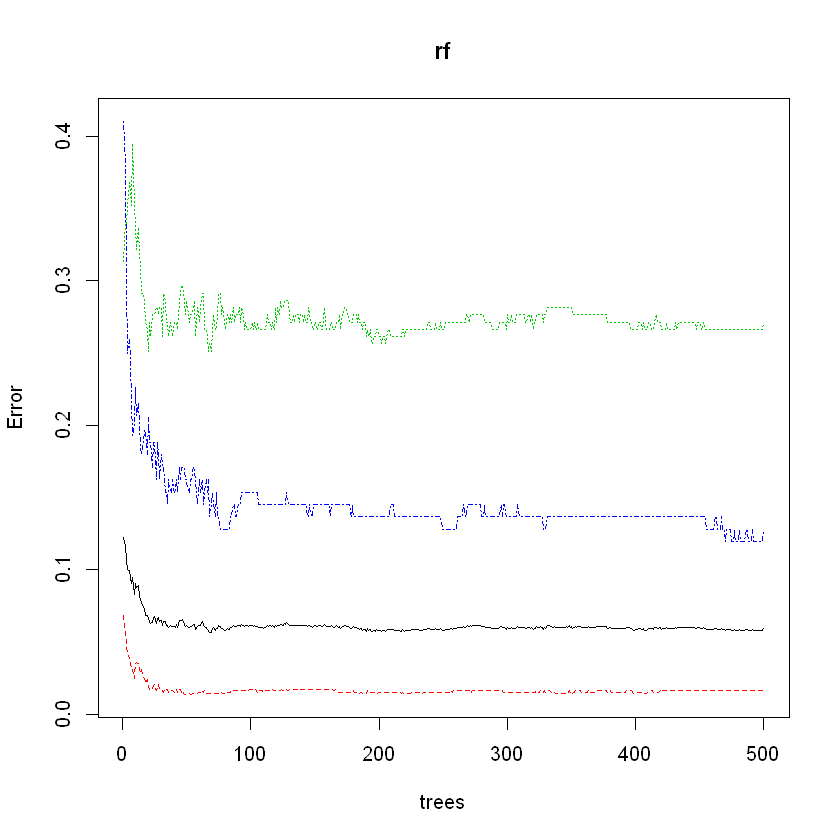

In [13]:
plot(rf)

# ATTRIBUTES OF RF MODEL

In [14]:
attributes(rf)

$names
 [1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

In [15]:
rf$confusion #Confusion matrix

1,2,3,class.error
1153,17,2,0.0162116
50,145,4,0.2713568
6,9,102,0.1282051


# PREDICTION & CONFUSION MATRIX - TRAINING DATA

In [16]:
pred <- predict(rf, train_df)

In [20]:
cbind(head(pred),head(train_df$NSP))

1,2,2
2,1,1
4,1,1
6,3,3
8,3,3
9,3,3


In [23]:
library(caret)
confusionMatrix(pred,train_df$NSP)

Confusion Matrix and Statistics

          Reference
Prediction    1    2    3
         1 1172    1    0
         2    0  198    0
         3    0    0  117

Overall Statistics
                                     
               Accuracy : 0.9993     
                 95% CI : (0.9963, 1)
    No Information Rate : 0.7876     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 0.9981     
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.9950  1.00000
Specificity            0.9968   1.0000  1.00000
Pos Pred Value         0.9991   1.0000  1.00000
Neg Pred Value         1.0000   0.9992  1.00000
Prevalence             0.7876   0.1337  0.07863
Detection Rate         0.7876   0.1331  0.07863
Detection Prevalence   0.7883   0.1331  0.07863
Balanced Accuracy      0.9984   0.9975  1.00000

# PREDICTION & CONFUSION MATRIX - TEST DATA

In [25]:
pred_test <- predict(rf, test_df)

In [26]:
confusionMatrix(pred_test,test_df$NSP)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 477  24   3
         2   5  70   2
         3   1   2  54

Overall Statistics
                                          
               Accuracy : 0.942           
                 95% CI : (0.9209, 0.9588)
    No Information Rate : 0.7571          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8456          
                                          
 Mcnemar's Test P-Value : 0.003761        

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9876   0.7292  0.91525
Specificity            0.8258   0.9871  0.99482
Pos Pred Value         0.9464   0.9091  0.94737
Neg Pred Value         0.9552   0.9537  0.99139
Prevalence             0.7571   0.1505  0.09248
Detection Rate         0.7476   0.1097  0.08464
Detection Prevalence   0.7900   0.1207  0.08934
Balanced Accuracy      0.9067   0.8581  0

# TUNING RF MODEL

mtry = 4  OOB error = 6.12% 
Searching left ...
mtry = 8 	OOB error = 5.44% 
0.1098901 0.05 
mtry = 16 	OOB error = 5.91% 
-0.08641975 0.05 
Searching right ...
mtry = 2 	OOB error = 6.85% 
-0.2592593 0.05 


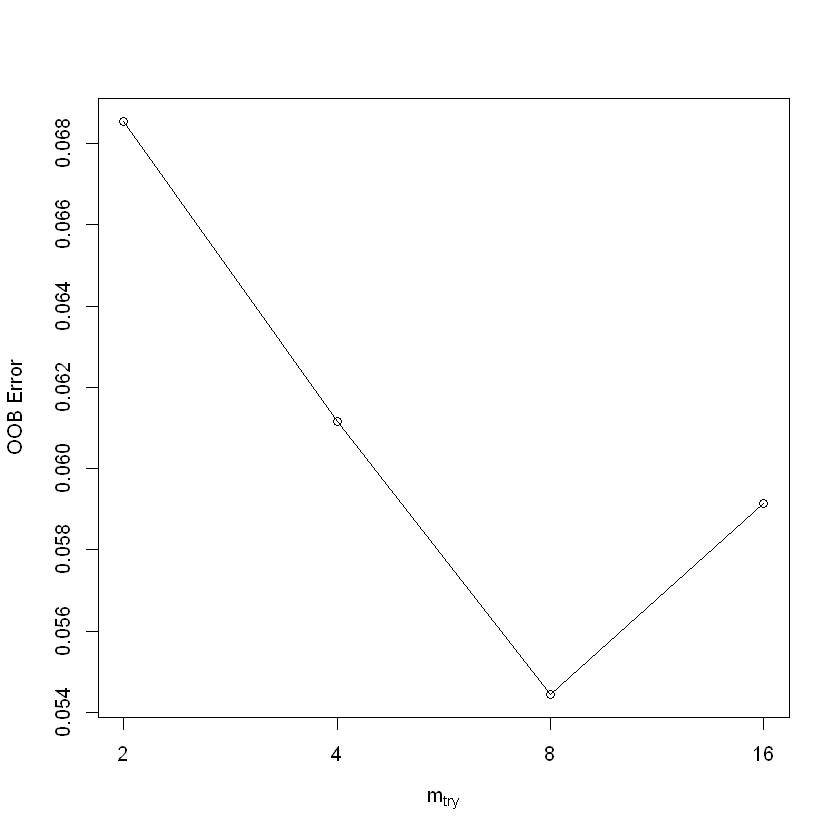

In [27]:
t <- tuneRF(train_df[,-22], train_df[,22],
       stepFactor = 0.5,
       plot = TRUE,
       ntreeTry = 300,
       trace = TRUE,
       improve = 0.05)

# HISTOGRAM - NUMBER OF NODES FOR THE TREES

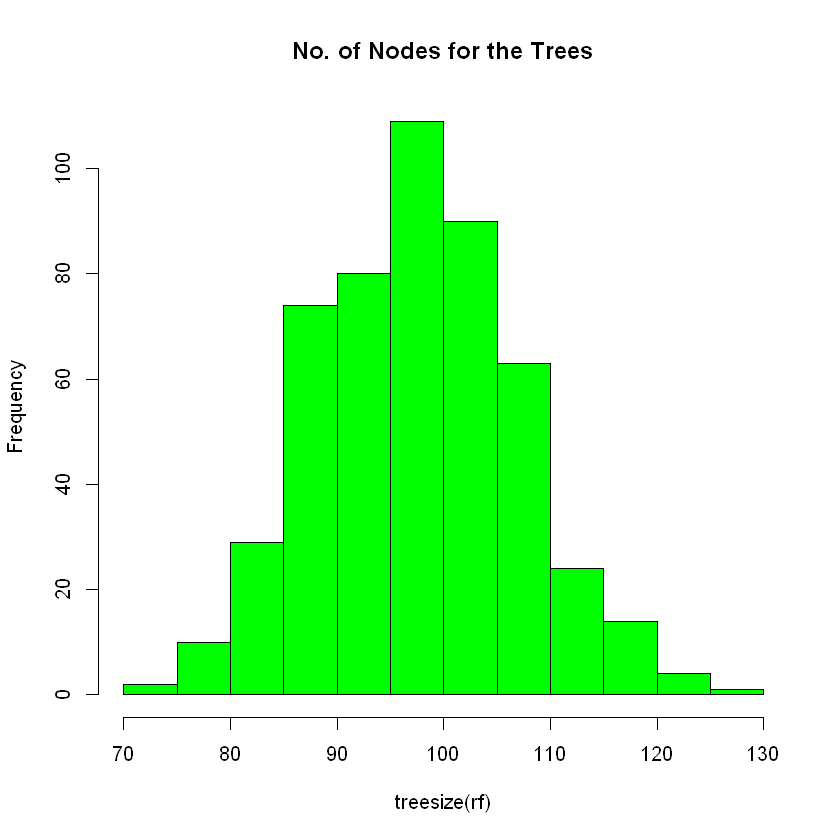

In [28]:
hist(treesize(rf),
     main = "No. of Nodes for the Trees",
     col = "green")

# Variable Importance Plot

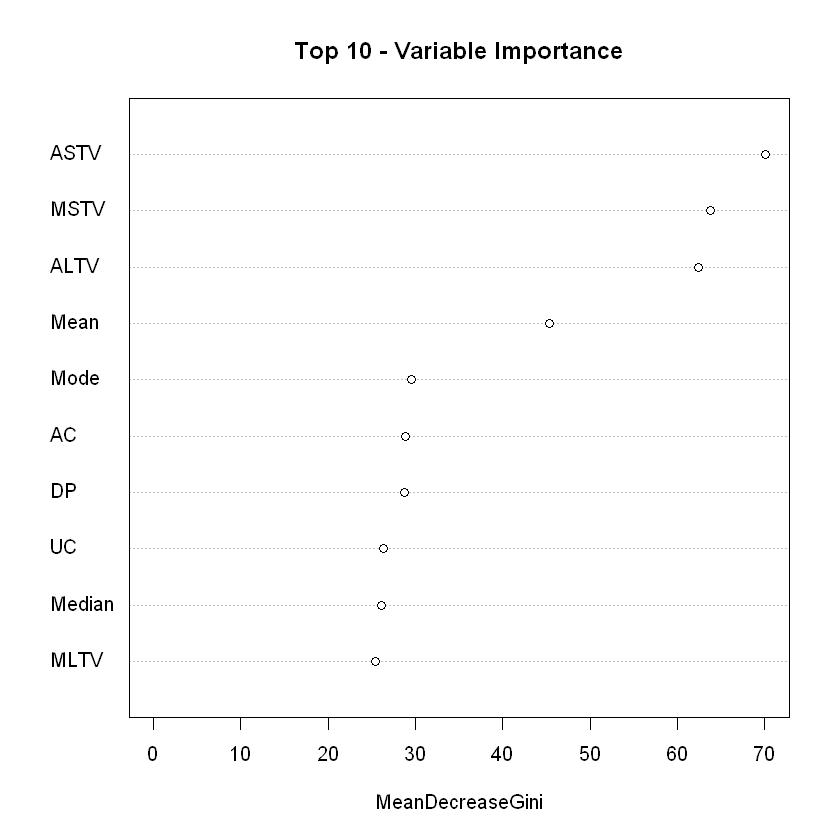

In [31]:
varImpPlot(rf,
           sort = T,
           n.var = 10,
           main = "Top 10 - Variable Importance")

# Variable Importance

In [33]:
importance(rf)

,MeanDecreaseGini
LB,19.1841940
AC,28.8858900
FM,12.7779320
UC,26.3292282
DL,5.2589319
DS,0.8153959
DP,28.7409945
ASTV,70.0478219
MSTV,63.8007912
ALTV,62.4130078


# Partial Plot - variable ASTV

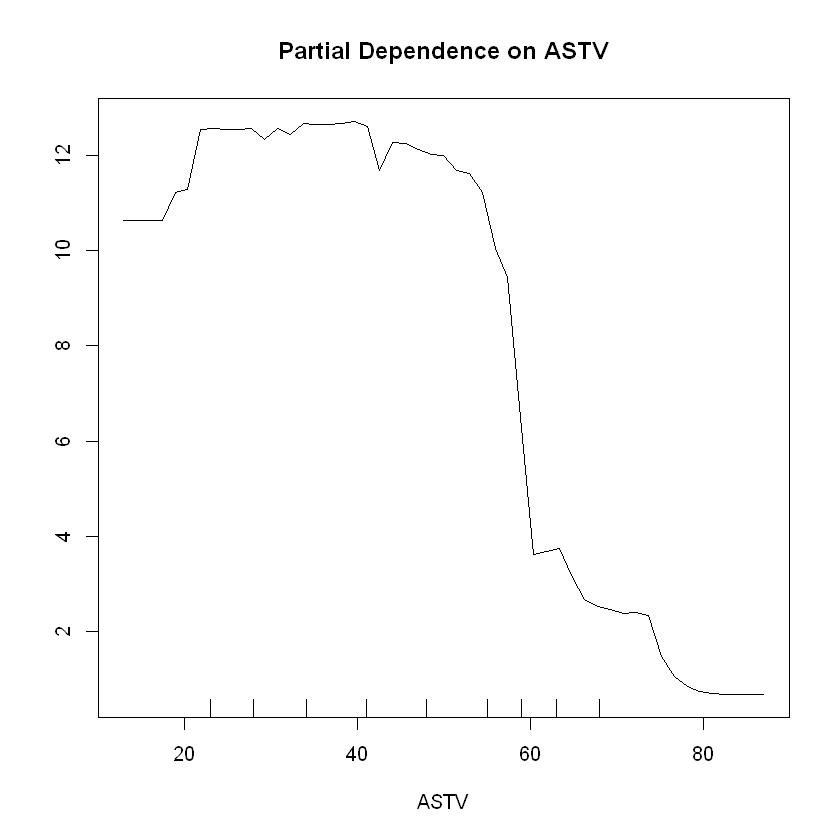

In [34]:
partialPlot(rf, train_df, ASTV, "1")

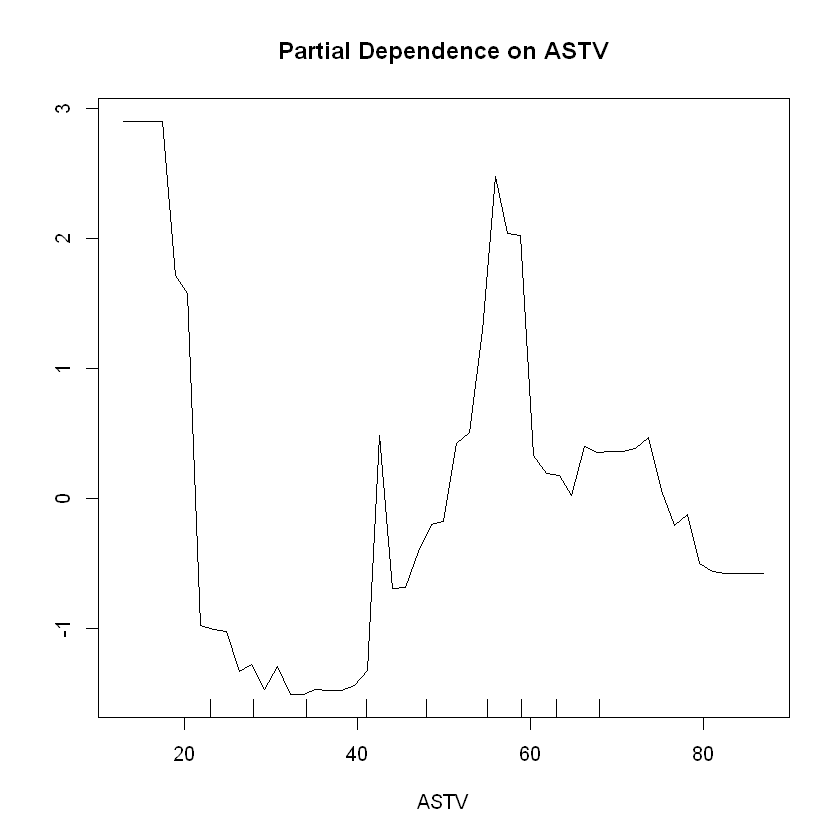

In [35]:
partialPlot(rf, train_df, ASTV, "2")

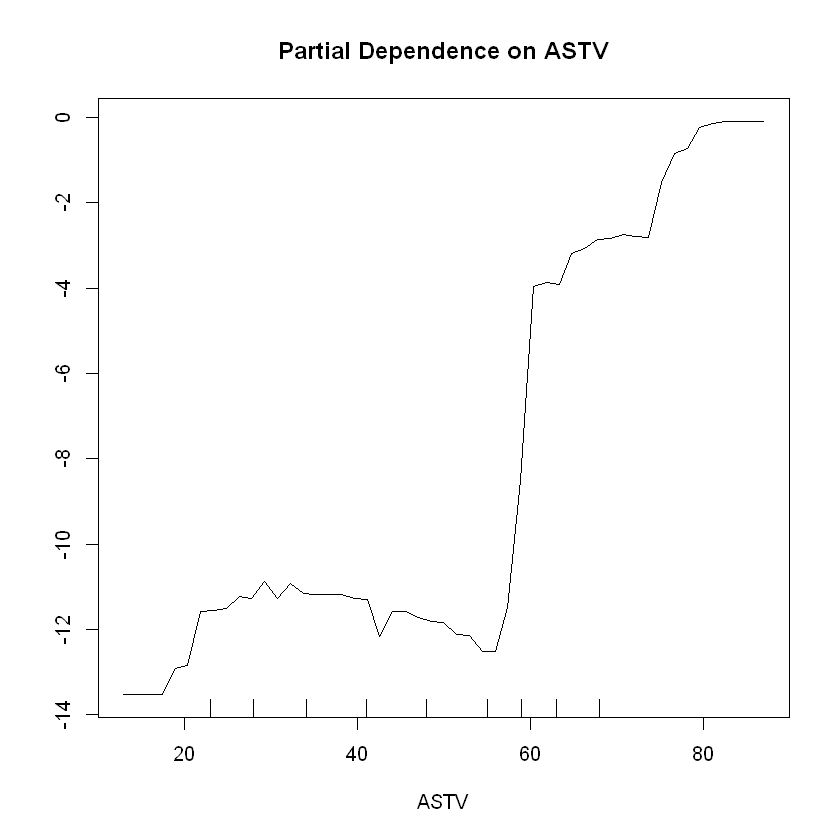

In [36]:
partialPlot(rf, train_df, ASTV, "3")

# Extracting single Tree

In [37]:
getTree(rf, 1, labelVar = TRUE)

left daughter,right daughter,split var,split point,status,prediction
2,3,Mean,1.055000e+02,1,NA
4,5,Max,2.340000e+02,1,NA
6,7,AC,1.556444e-03,1,NA
8,9,Nmax,1.150000e+01,1,NA
0,0,NA,0.000000e+00,-1,1
10,11,Mean,1.345000e+02,1,NA
12,13,DP,2.220778e-03,1,NA
14,15,DL,1.224609e-02,1,NA
0,0,NA,0.000000e+00,-1,1
16,17,Mean,1.085000e+02,1,NA
